In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

from matplotlib.pyplot import subplots, show
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
# Name of MDS procedures and number of dimensions to check stress-1
list_procedures = ("classic", "dissim", "SMACOF-euclidean", "SMACOF-dissim", "SMACOF-euclidean-classic", "SMACOF-dissim-classic")
list_dimensions = list(range(1, 7))

# SMACOF hyperpameters
max_iters = 1000
eps = 1e-6

# Time Series Clustering through MDS class instance
TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

### Exploración de métodos MDS

In [4]:
stress_by_procedure = dict()

for procedure in list_procedures:
    stress_by_procedure[procedure] = len(list_dimensions)*[0.0]
    for k, num_dim in enumerate(list_dimensions):
        stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = procedure, max_iter = max_iters, eps = eps, verbose = 1, visualize_shepard = False)
        stress_by_procedure[procedure][k] = stress

classic with 1 components has a stress-1 value of 0.317680
classic with 2 components has a stress-1 value of 0.210234
classic with 3 components has a stress-1 value of 0.146602
classic with 4 components has a stress-1 value of 0.117086
classic with 5 components has a stress-1 value of 0.093122
classic with 6 components has a stress-1 value of 0.083591
dissim with 1 components has a stress-1 value of 0.317681
dissim with 2 components has a stress-1 value of 0.210234
dissim with 3 components has a stress-1 value of 0.146602
dissim with 4 components has a stress-1 value of 0.117086
dissim with 5 components has a stress-1 value of 0.093121
dissim with 6 components has a stress-1 value of 0.083591
breaking at iteration 101 with stress 544760992.7933244
breaking at iteration 120 with stress 544892012.616757
breaking at iteration 138 with stress 544754896.7296251
breaking at iteration 308 with stress 546811090.6846048
SMACOF-euclidean with 1 components has a stress-1 value of 0.482712
breakin

## Curvas Stress-1

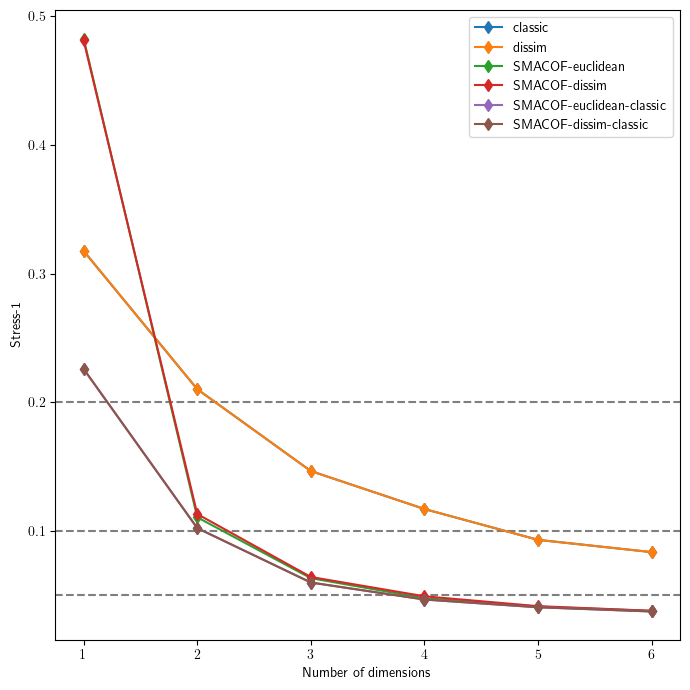

In [5]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

for procedure in list_procedures:
    Subplot.plot(list_dimensions, stress_by_procedure[procedure], "-d", label =  procedure)
Subplot.axhline(y = 0.2, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.axhline(y = 0.1, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.axhline(y = 0.05, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.set_xlabel("Number of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()